# COMS4060A - Introduction of Data Visualisation & Exploration: Assignment 3

## Group Members
* Lisa Godiwn - 2437980
* Nihal Ranchod - 2427378
* Zach Schwark - 2434346

Imports

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset: NBA player statisitcs for the 2022-2023 regular season

Reading in the .csv file and creating a dataframe.

In [31]:
df_stats = pd.read_csv('nba_2022-23_stats.csv')

df_stats_copy = df_stats.copy()
display(df_stats_copy.head())

,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9


### Question 1: Data Cleaning

Data Inspection

In [32]:
# Display the info of the DataFrame
df_stats_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     467 non-null    int64  
 1   Player Name    467 non-null    object 
 2   Salary         467 non-null    int64  
 3   Position       467 non-null    object 
 4   Age            467 non-null    int64  
 5   Team           467 non-null    object 
 6   GP             467 non-null    int64  
 7   GS             467 non-null    int64  
 8   MP             467 non-null    float64
 9   FG             467 non-null    float64
 10  FGA            467 non-null    float64
 11  FG%            466 non-null    float64
 12  3P             467 non-null    object 
 13  3PA            467 non-null    float64
 14  3P%            454 non-null    float64
 15  2P             467 non-null    float64
 16  2PA            467 non-null    float64
 17  2P%            463 non-null    float64
 18  eFG%      

**Noticed:**
- First column in labeled `Unnamed`
- Column `3P (3-Point Field Goals Per Game)` is of datatype `object`

In [33]:
# Change Unnamed column to Rank

# Rename the 'Unnamed: 0' column to 'Rank'
df_stats_copy.rename(columns={'Unnamed: 0': 'Rank'}, inplace=True)

# Convert the '3P' column to float64
df_stats_copy['3P'] = pd.to_numeric(df_stats_copy['3P'], errors='coerce')
df_stats_copy['3P'] = df_stats_copy['3P'].astype('float64')

df_stats_copy.info(['Rank', '3P'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           467 non-null    int64  
 1   Player Name    467 non-null    object 
 2   Salary         467 non-null    int64  
 3   Position       467 non-null    object 
 4   Age            467 non-null    int64  
 5   Team           467 non-null    object 
 6   GP             467 non-null    int64  
 7   GS             467 non-null    int64  
 8   MP             467 non-null    float64
 9   FG             467 non-null    float64
 10  FGA            467 non-null    float64
 11  FG%            466 non-null    float64
 12  3P             466 non-null    float64
 13  3PA            467 non-null    float64
 14  3P%            454 non-null    float64
 15  2P             467 non-null    float64
 16  2PA            467 non-null    float64
 17  2P%            463 non-null    float64
 18  eFG%      

In [34]:
# Check for missing values
df_stats_copy.isnull().sum()

Rank              0
Player Name       0
Salary            0
Position          0
Age               0
Team              0
GP                0
GS                0
MP                0
FG                0
FGA               0
FG%               1
3P                1
3PA               0
3P%              13
2P                0
2PA               0
2P%               4
eFG%              1
FT                0
FTA               0
FT%              23
ORB               0
DRB               0
TRB               0
AST               0
STL               0
BLK               0
TOV               0
PF                0
PTS               0
Total Minutes     0
PER               0
TS%               1
3PAr              1
FTr               1
ORB%              0
DRB%              0
TRB%              0
AST%              0
STL%              0
BLK%              0
TOV%              0
USG%              0
OWS               0
DWS               0
WS                0
WS/48             0
OBPM              0
DBPM              0


**Missing Values:**
- `FG%` -> 1 value missing
- `3P` -> 1 value missing
- `3P%` -> 13 values missing
- `2P%` -> 4 values missing
- `eFG%` -> 1 value missing
- `FT%` -> 23 values missing
- `TS%` -> 1 value missing
- `3PAr` -> 1 value missing
- `FTr` -> 1 value missing

In this project, we opted to handle missing values by calculating or imputing them rather than dropping the rows or entries. This decision was motivated by several key considerations:

1. Preserving Data Integrity
    - Maximizing Data Utilisation: By calculating or imputing missing values, we ensure that we make the most out of the available data. Dropping rows with missing values can lead to a significant loss of information, especially if the dataset is not very large.
    - Maintaining Representativeness: Removing rows with missing values can introduce bias, as the remaining data may no longer be representative of the original dataset. By imputing missing values, we preserve the dataset's structure and distribution.

2. Leveraging Domain Knowledge
    - Informed Calculations: Many missing values can be calculated using existing domain knowledge and relationships between variables. For example, FG% (Field Goal Percentage) can be calculated from FG (Field Goals) and FGA (Field Goals Attempted). Similarly, TS% (True Shooting Percentage) can be derived from PTS (Points), FGA, and FTA (Free Throw Attempts). Utilizing these relationships allows us to fill in missing values accurately.
    - Handling Edge Cases: By explicitly handling cases where the respective columns are zero, we ensure that our calculations are robust and avoid division by zero errors. This careful handling maintains the integrity of the calculated values.

Since `FA` and `FGA` don't have any missing values then `FG%` can be calculated.

In [35]:
# Field Goal Percentage Missing Value

# Calculate FG% where possible
df_stats_copy['FG%'] = df_stats_copy.apply(
    lambda row: (row['FG'] / row['FGA'] * 100) if pd.isnull(row['FG%']) and not pd.isnull(row['FG']) and not pd.isnull(row['FGA']) and row['FGA'] != 0 else (0 if row['FG'] == 0 and row['FGA'] == 0 else row['FG%']), 
    axis=1
)

Calculating value for missing `3P` value if `3PA` & `3P%` are valid.

In [36]:
# 3P Missing Value

# Calculate 3P where possible
df_stats_copy['3P'] = df_stats_copy.apply(
    lambda row: (row['3PA'] * (row['3P%'] / 100)) if pd.isnull(row['3P']) and not pd.isnull(row['3PA']) and not pd.isnull(row['3P%']) and row['3PA'] != 0 else row['3P'], 
    axis=1
)

Since `3P` and `3PA` don't have any missing values then the `3P%` can be calculated.

In [37]:
# 3-Point Field Goal Percentage Missing Value

# Calculate 3P% where possible
df_stats_copy['3P%'] = df_stats_copy.apply(
    lambda row: (row['3P'] / row['3PA'] * 100) if pd.isnull(row['3P%']) and not pd.isnull(row['3P']) and not pd.isnull(row['3PA']) and row['3PA'] != 0 else (0 if row['3P'] == 0 and row['3PA'] == 0 else row['3P%']), 
    axis=1
)

Since `2P` and `2PA` don't have missing values then `2P%` can be calculated.

In [38]:
# 2-Point Field Goal Percentage Missing Value

# Calculate 3P% where possible
df_stats_copy['2P%'] = df_stats_copy.apply(
    lambda row: (row['2P'] / row['2PA'] * 100) if pd.isnull(row['3P%']) and not pd.isnull(row['2P']) and not pd.isnull(row['2PA']) and row['2PA'] != 0 else (0 if row['2P'] == 0 and row['2PA'] == 0 else row['3P%']), 
    axis=1
)

The effective field goal percentage `(eFG%)` adjusts field goal percentage to account for the extra value of a 3-point field goal:

$$
eFG\% = \frac{FG + 0.5 \times 3P}{FGA}
$$

where:
- \( FG \) = Field Goals Made
- \( 3P \) = Three-Point Field Goals Made
- \( FGA \) = Field Goal Attempts

In [39]:
# Calculate eFG% where possible
df_stats_copy['eFG%'] = df_stats_copy.apply(
    lambda row: ((row['FG'] + 0.5 * row['3P']) / row['FGA'] * 100) if pd.isnull(row['eFG%']) and not pd.isnull(row['FG']) and not pd.isnull(row['3P']) and not pd.isnull(row['FGA']) and row['FGA'] != 0 else (0 if row['FGA'] == 0 else row['eFG%']), 
    axis=1
)

Since `FT` & `FTA` don't have any missing values then `FT%` can be calculated.

In [40]:
# Free Throw Percentage Missing Value

# Calculate FT% where possible
df_stats_copy['FT%'] = df_stats_copy.apply(
    lambda row: (row['FT'] / row['FTA'] * 100) if pd.isnull(row['FT%']) and not pd.isnull(row['FT']) and not pd.isnull(row['FTA']) and row['FTA'] != 0 else (0 if row['FT'] == 0 and row['FTA'] == 0 else row['FT%']), 
    axis=1
)

The true shooting percentage `(TS%)` measures scoring efficiency by incorporating field goals, free throws, and three-pointers:

$$
TS\% = \frac{0.5 \times \text{PTS}}{\text{FGA} + 0.44 \times \text{FTA}}
$$

where:
- \( PTS \) = Total Points Scored Per Game
- \( FGA \) = Total Field Goal Attempts
- \( FTA \) = Total Free Throw Attempts


In [41]:
# Calculate TS% where possible using the specified formula
df_stats_copy['TS%'] = df_stats_copy.apply(
    lambda row: (0.5 * row['PTS'] / (row['FGA'] + 0.44 * row['FTA']) * 100) if pd.isnull(row['TS%']) and not pd.isnull(row['PTS']) and not pd.isnull(row['FGA']) and not pd.isnull(row['FTA']) and (row['FGA'] + 0.44 * row['FTA']) != 0 else (0 if (row['FGA'] + 0.44 * row['FTA']) == 0 else row['TS%']), 
    axis=1
)

The `3PAr` (3-Point Attempt Rate) can be calculated using the formula:

$$
3PAr = \frac{3PA}{FGA}
$$

where:
- \( 3PA \) = 3-Point Field Goal Attempts Per Game
- \( FGA \) = Total Field Goal Attempts Per Game

In [42]:
# Calculate 3PAr where possible
df_stats_copy['3PAr'] = df_stats_copy.apply(
    lambda row: (row['3PA'] / row['FGA']) if pd.isnull(row['3PAr']) and not pd.isnull(row['3PA']) and not pd.isnull(row['FGA']) and row['FGA'] != 0 else (0 if row['FGA'] == 0 else row['3PAr']), 
    axis=1
)

The `FTr` (Free Throw Rate) can be calculated using the formula:

$$
FTr = \frac{FTA}{FGA}
$$

where:
- \( FTA \) = Free Throw Attempts Per Game
- \( FGA \) = Total Field Goal Attempts Per Game

In [43]:
# Calculate FTr where possible
df_stats_copy['FTr'] = df_stats_copy.apply(
    lambda row: (row['FTA'] / row['FGA']) if pd.isnull(row['FTr']) and not pd.isnull(row['FTA']) and not pd.isnull(row['FGA']) and row['FGA'] != 0 else (0 if row['FGA'] == 0 else row['FTr']), 
    axis=1
)

Final check of missing values.

In [44]:
df_stats_copy.isnull().sum()

Rank             0
Player Name      0
Salary           0
Position         0
Age              0
Team             0
GP               0
GS               0
MP               0
FG               0
FGA              0
FG%              0
3P               0
3PA              0
3P%              0
2P               0
2PA              0
2P%              0
eFG%             0
FT               0
FTA              0
FT%              0
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
PTS              0
Total Minutes    0
PER              0
TS%              0
3PAr             0
FTr              0
ORB%             0
DRB%             0
TRB%             0
AST%             0
STL%             0
BLK%             0
TOV%             0
USG%             0
OWS              0
DWS              0
WS               0
WS/48            0
OBPM             0
DBPM             0
BPM              0
VORP             0
dtype: int64

In [45]:
df_stats_copy.describe()

,Rank,Salary,Age,GP,GS,MP,FG,FGA,FG%,3P,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,467.000000,4.670000e+02,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,...,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,233.000000,8.416599e+06,25.820128,48.233405,22.650964,19.871306,3.351392,7.117773,0.464013,0.993182,...,12.735974,18.425910,1.208351,1.120557,2.328908,0.081771,-1.344968,-0.087152,-1.432548,0.539829
std,134.955548,1.070812e+07,4.275113,24.807740,27.094577,9.548684,2.457836,5.020700,0.111525,0.881189,...,7.198533,5.909528,1.765160,0.980478,2.533094,0.088089,3.578193,2.243437,4.925175,1.172960
min,0.000000,5.849000e+03,19.000000,1.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.100000,-1.900000,0.000000,-1.600000,-0.517000,-22.500000,-10.400000,-26.500000,-1.300000
25%,116.500000,1.782621e+06,23.000000,31.000000,1.000000,12.500000,1.600000,3.300000,0.417000,0.300000,...,9.500000,14.300000,0.000000,0.300000,0.300000,0.047000,-2.900000,-0.900000,-3.300000,-0.100000
50%,233.000000,3.722040e+06,25.000000,55.000000,8.000000,19.200000,2.700000,5.800000,0.455000,0.800000,...,11.900000,17.600000,0.600000,0.900000,1.500000,0.087000,-1.300000,-0.100000,-1.300000,0.100000
75%,349.500000,1.063354e+07,29.000000,68.500000,45.500000,28.300000,4.300000,9.400000,0.507000,1.500000,...,15.000000,21.150000,1.800000,1.800000,3.550000,0.129500,0.450000,0.800000,0.600000,0.800000
max,466.000000,4.807001e+07,42.000000,83.000000,83.000000,41.000000,11.200000,22.200000,1.000000,4.900000,...,100.000000,52.500000,9.600000,4.800000,12.600000,0.626000,17.000000,32.700000,48.600000,6.400000


**Noticed:** Maximum number of games played (`GP`) is 83. A regular NBA consists of each team playing 82 games.

In [46]:
most_games = df_stats_copy[['Player Name', 'GP']].sort_values(by='GP', ascending=False)
most_games.head()

,Player Name,GP
59,Mikal Bridges,83
242,Tari Eason,82
66,Harrison Barnes,82
228,Jordan Poole,82
73,Derrick White,82


In [47]:
mikal = df_stats_copy[df_stats_copy['Player Name'] == 'Mikal Bridges']
mikal

,Rank,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
59,59,Mikal Bridges,20100000,SF-SG,26,BRK/PHO,83,83,35.7,7.1,...,8.2,22.6,4.4,3.1,7.5,0.121,1.5,0.2,1.7,2.8


Given that this player has played for two teams (Brooklyn Nets & Phoenix Suns), it is not possible for a player to have played more games than the total number of games in a regular season, even if the player played for multiple teams. For example, the NBA regular season consists of 82 games per team. Therefore, a player cannot play more than 82 games in a single regular season. If a player appears to have played 83 games, it is likely due to a data entry error. Due to this, we have decided to remove this entry to maintain the integrity and accuracy of our dataset.

In [50]:
# Remove Player: Mikal Bridges
df_stats_copy = df_stats_copy[df_stats_copy['Player Name'] != 'Mikal Bridges']

# Reset the index
df_stats_copy.reset_index(drop=True, inplace=True)

# Reassign the ranks
df_stats_copy['Rank'] = df_stats_copy.index + 1

Plotting Key Metrics:
1. Points (PTS)
    - Reasoning: Points scored is a fundamental measure of a player's offensive contribution. It directly impacts the outcome of games and is a primary performance indicator.

2. Field Goal Percentage (FG%)
    - Reasoning: FG% measures shooting efficiency. A higher FG% indicates better shooting accuracy, which is crucial for scoring efficiency.

3. Three-Point Percentage (3P%)
    - Reasoning: With the increasing importance of three-point shooting in modern basketball, 3P% is a critical metric for evaluating a player's long-range shooting ability.

4. Free Throw Percentage (FT%)
    - Reasoning: FT% measures a player's efficiency at the free-throw line. Free throws are often critical in close games, making this an important metric.

5. Total Rebound Percentage (TRB%)
    - Reasoning: Total rebounds (TRB) measure a player's ability to retrieve the ball after missed shots, contributing to both offensive and defensive possessions.

6. Assists Percentage (AST%)
    - Reasoning: Assists indicate a player's ability to create scoring opportunities for teammates, reflecting their playmaking skills.

7. Steals Percentage (STL%)
    - Reasoning: Steals measure a player's defensive ability to disrupt the opposing team's offense by taking the ball away.

8. Blocks Percentage (BLK%)
    - Reasoning: Blocks indicate a player's ability to prevent the opposing team from scoring by deflecting their shots.

9. Turnovers Percentage (TOV%)
    - Reasoning: Turnovers measure the number of times a player loses possession of the ball, which negatively impacts the team's performance.

10. Player Efficiency Rating (PER)
    - Reasoning: PER is a comprehensive metric that summarizes a player's overall statistical performance into a single number, making it a valuable indicator of overall efficiency.

11. True Shooting Percentage (TS%)
    - Reasoning: TS% accounts for field goals, three-point field goals, and free throws, providing a more comprehensive measure of shooting efficiency.

12. Usage Percentage (USG%)
    - Reasoning: USG% measures the percentage of team plays used by a player while on the court, indicating their involvement in the team's offense.

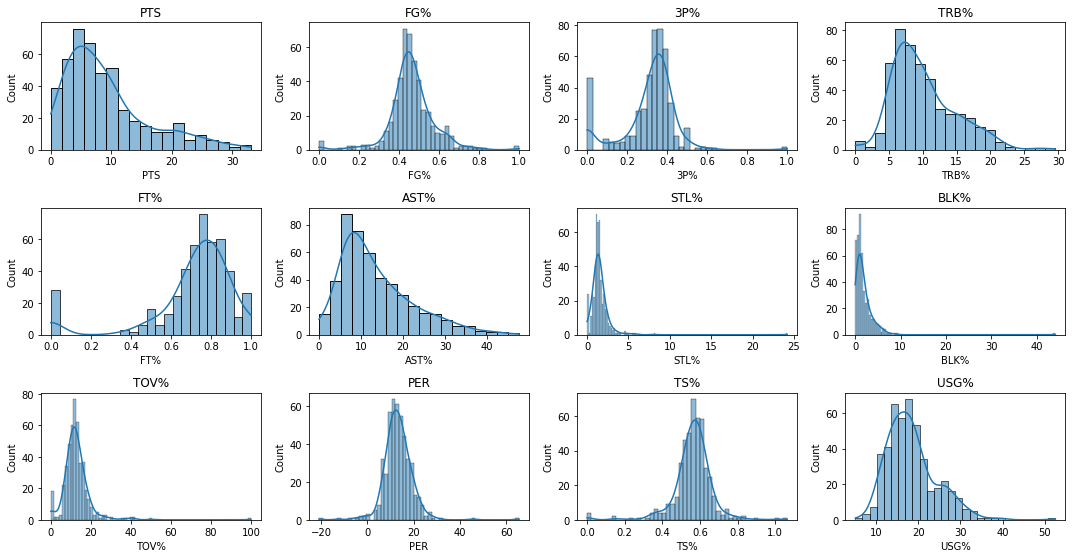

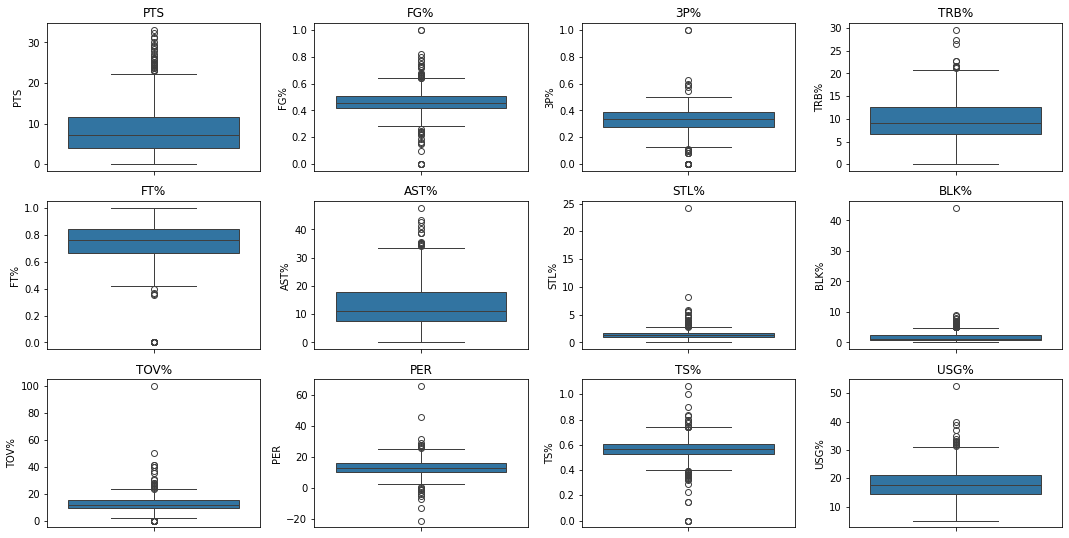

In [56]:
# Plot distributions of key metrics
key_metrics = ['PTS', 'FG%', '3P%', 'TRB%', 'FT%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'PER', 'TS%', 'USG%']

plt.figure(figsize=(15, 10))
for i, metric in enumerate(key_metrics, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df_stats_copy[metric].dropna(), kde=True)
    plt.title(metric)

plt.tight_layout()
plt.savefig("Question 1 Plots/distribution_plots.png")
plt.show()

# Check for outliers using box plots
plt.figure(figsize=(15, 10))
for i, metric in enumerate(key_metrics, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df_stats_copy[metric].dropna())
    plt.title(metric)

plt.tight_layout()
plt.savefig("Question 1 Plots/box_plots.png")
plt.show()

Correlation Analysis:

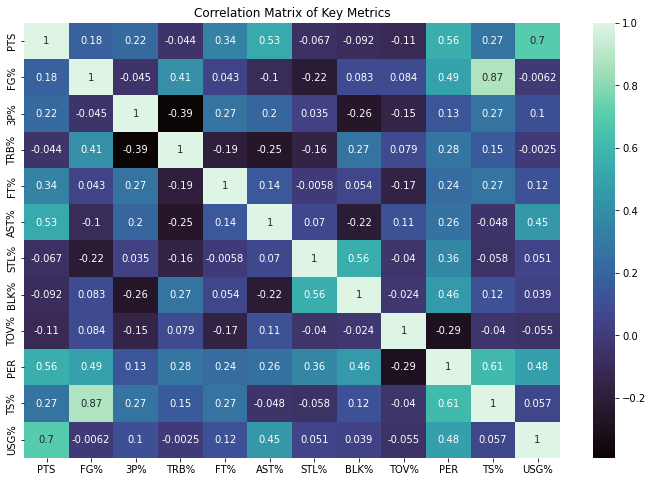

In [59]:
# Correlation analysis
correlation_matrix = df_stats_copy[key_metrics].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='mako')
plt.title('Correlation Matrix of Key Metrics')
plt.savefig("Question 1 Plots/correlation_matrix.png")
plt.show()